In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)

# import classification algorithm
from sklearn.linear_model import LogisticRegression

# evaluation matrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    plot_confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier

# import preprocessing module
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabpfn import TabPFNClassifier
from tqdm import tqdm

SEED = 42

/home/balde/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("diabetes-data-upload.csv")
data = pd.read_csv(
    "diabetes.xls",
)

In [3]:
df.shape, data.shape

((521, 17), (768, 9))

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape, data.shape

((521, 17), (768, 9))

In [7]:
# For Plot Annotation


def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    plt.show()


def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = "{:.1f}%".format(
                100 * a[(j * Number_of_categories + i)] / total
            )
            x = (
                patch[(j * Number_of_categories + i)].get_x()
                + patch[(j * Number_of_categories + i)].get_width() / 2
                - 0.15
            )
            y = (
                patch[(j * Number_of_categories + i)].get_y()
                + patch[(j * Number_of_categories + i)].get_height()
            )
            ax.annotate(percentage, (x, y), size=12)
    plt.show()

# Distrubition du target variable.

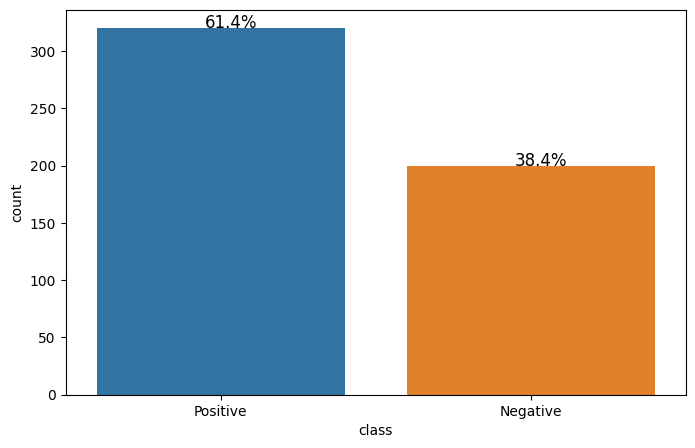

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="class",
    data=df,
    order=df["class"].value_counts().index,
)
without_hue(ax, df["class"])

# Distribution de l'age de patient.

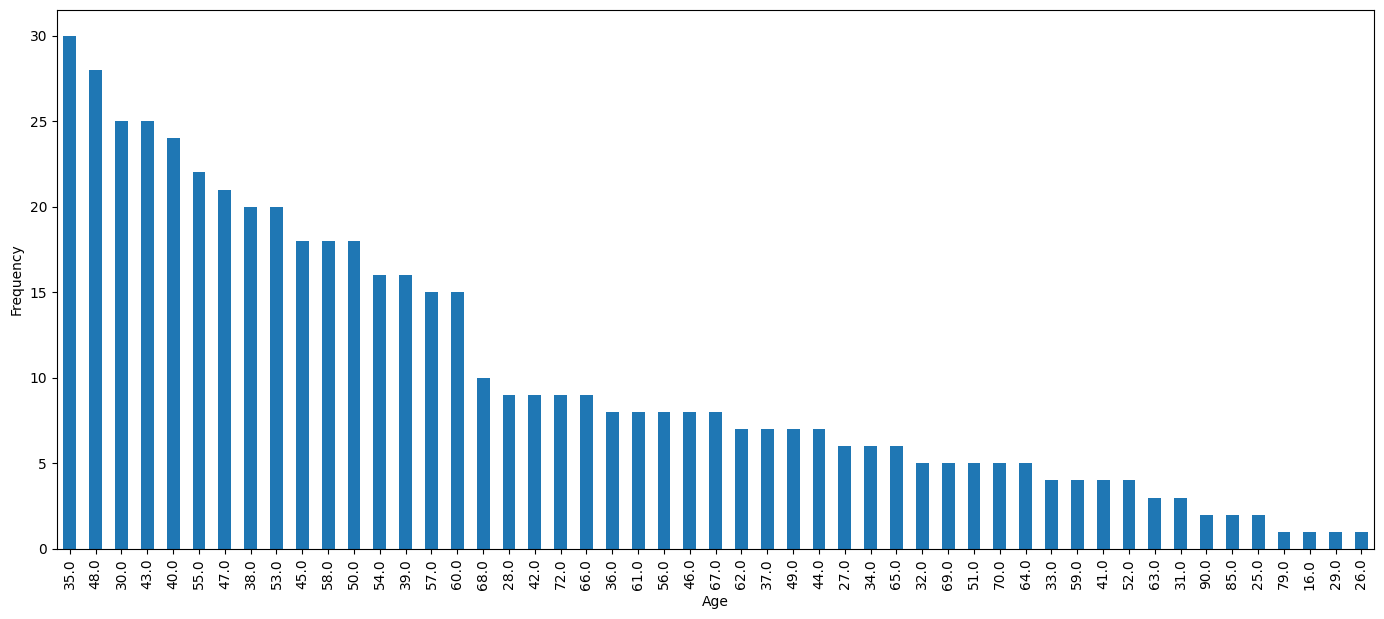

In [9]:
plt.figure(figsize=(17, 7))
df.Age.value_counts().plot(kind="bar")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

# Distribution d'Obesity base on age.

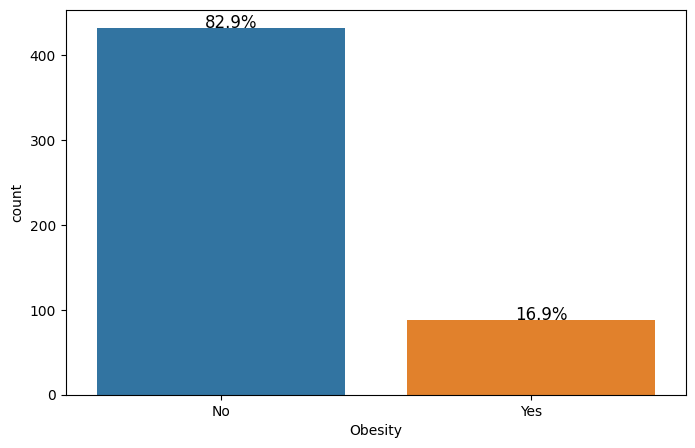

In [10]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="Obesity",
    data=df,
    order=df["Obesity"].value_counts().index,
)
without_hue(ax, df["Obesity"])

In [11]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


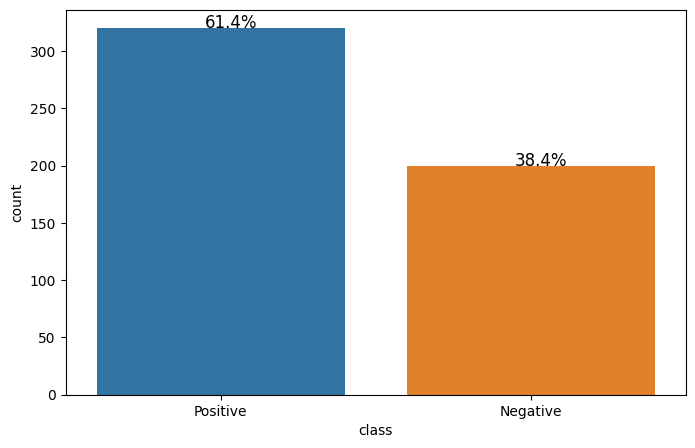

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="class",
    data=df,
    order=df["class"].value_counts().index,
)
without_hue(ax, df["class"])

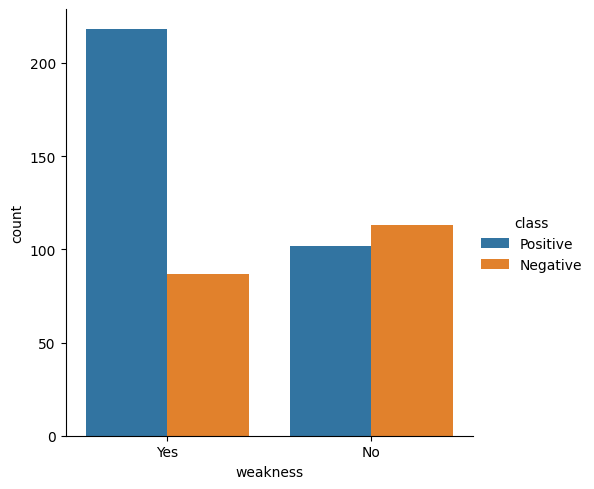

In [13]:
sns.catplot(x="weakness", data=df, kind="count", hue="class")
plt.show()

# Now we are going to convert the categorical variable into numerial using Label ENcoder.
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1<br>
we are going to use it to change our class positive to 1 and negative to 0. 

In [14]:
df["class"] = df["class"].map({"Positive": 1, "Negative": 0})

In [15]:
df.dropna(how="any", inplace=True)
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Now we are going to Encode all categorical varable with the help of lable encoder because it's not ordered object.

Here we are going to encode all categorical variable using the for loop below.<br> we are going to first find all the columns in the dataset where the dtype is **object** meaning that the column is categorical we will fit and transform with our **LabelEncoder()** object that we create on the cell above.

In [16]:
le = LabelEncoder()
for col in tqdm(df.columns.to_list()):
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

df.head()

100%|███████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 1633.11it/s]


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1.0
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1.0
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1.0
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1.0
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1.0


In [17]:
df["class"].value_counts()

1.0    320
0.0    200
Name: class, dtype: int64

#### After runing the cell above we can see that all other categorical data is encode into values(numbers from 0 to n-1)

# Now we are selecting the X and y variable.
Here **X** is the features variable such as weakness visual Itching and so on and **y** is our target(label) variable meaning the class column<br>

In [18]:
X = df.drop("class", axis=1)
y = df["class"]

In [19]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [20]:
y.value_counts()

1.0    320
0.0    200
Name: class, dtype: int64

We are going to standarize the data.

In [21]:
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline(
#     [
#         ("impute", SimpleImputer()),
#         ("scaler", StandardScaler()),
#         # ('scale', RobustScaler())
#         # ('quantiletransform', QuantileTransformer(random_state=seed))
#     ]
# )

# X = pd.DataFrame(columns=X.columns, data=pipeline.fit_transform(X))

In [22]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [23]:
X.dropna(how="any", inplace=True)
X.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## We are going to try out different model and check the f1 score of each algorithms

In [25]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
models = {
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "DTC": DecisionTreeClassifier(),
    "HGB": HistGradientBoostingClassifier(),
    "ADB": AdaBoostClassifier(),
    "Tabpfn": TabPFNClassifier(N_ensemble_configurations=24),
}


for model_name, model in models.items():
    print("Train {}".format(model_name))
    # cross_val_score for each classifier
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1")

    print("List of scores for {}: {}".format(model_name, scores))
    print("The mean score for {}: {}".format(model_name, scores.mean()))
    print("-------------The End------------------")

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Train KNN
List of scores for KNN: [0.91304348 0.83146067 0.86363636 0.84444444 0.83870968]
The mean score for KNN: 0.8582589275836672
-------------The End------------------
Train RF
List of scores for RF: [0.98969072 1.         0.98969072 1.         0.94      ]
The mean score for RF: 0.9838762886597939
-------------The End------------------
Train GB
List of scores for GB: [0.97959184 1.         0.94623656 0.98969072 0.95833333]
The mean score for GB: 0.9747704901714593
-------------The End------------------
Train DTC
List of scores for DTC: [0.96842105 0.95744681 0.95918367 0.98947368 0.96907216]
The mean score for DTC: 0.968719476754117
-------------The End------------------
Train HGB
List of scores for HGB: [0.96907216 0.92783505 1.         0.95744681 0.96774194]
The mean score for HGB: 0.964419192097871
-------------The End------------------
Train ADB
List of scores for ADB: [0.93617021 0.9

# Decision tree Algorithm

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

f1_dt = f1_score(y_test, y_pred_dt)
precision_score_dt = precision_score(y_test, y_pred_dt)
recall_df = recall_score(y_test, y_pred_dt)
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

In [27]:
print(f"Accuracy of dt: {accuracy_score_dt}")
print(f"precision of dt: {precision_score_dt}")
print(f"f1 of dt: {f1_dt}")
print(f"recall of df: {recall_df}")

Accuracy of dt: 0.9615384615384616
precision of dt: 0.95
f1 of dt: 0.9681528662420381
recall of df: 0.987012987012987


## Classification report for decision tree.

In [28]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        53
         1.0       0.95      0.99      0.97        77

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



# Random Forest Algorithm

In [29]:
rfc = RandomForestClassifier(
    n_estimators=200,
)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

f1_rfc = f1_score(y_test, y_pred_rfc)
precision_score_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)

In [30]:
print(f"Accuracy of rfc: {accuracy_score_rfc}")
print(f"precision of rfc: {precision_score_rfc}")
print(f"f1 of rfc: {f1_rfc}")
print(f"recall of rfc: {recall_rfc}")

Accuracy of rfc: 0.9769230769230769
precision of rfc: 0.9625
f1 of rfc: 0.980891719745223
recall of rfc: 1.0


# Logistic Regression

In [31]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

f1_lg = f1_score(y_test, y_pred_lg)
precision_score_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
accuracy_score_lg = accuracy_score(y_test, y_pred_lg)

/home/balde/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print(f"Accuracy of lg: {accuracy_score_lg}")
print(f"precision of lg: {precision_score_lg}")
print(f"f1 of lg: {f1_lg}")
print(f"recall of lg: {recall_lg}")

Accuracy of lg: 0.9230769230769231
precision of lg: 0.9135802469135802
f1 of lg: 0.9367088607594937
recall of lg: 0.961038961038961


# Gradient Boosting tree

In [33]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

f1_gbc = f1_score(y_test, y_pred_gbc)
precision_score_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
accuracy_score_gbc = accuracy_score(y_test, y_pred_gbc)

In [34]:
print(f"Accuracy of gbc: {accuracy_score_gbc}")
print(f"precision of gbc: {precision_score_gbc}")
print(f"f1 of gbc: {f1_gbc}")
print(f"recall of gbc: {recall_gbc}")

Accuracy of gbc: 0.9692307692307692
precision of gbc: 0.9620253164556962
f1 of gbc: 0.9743589743589742
recall of gbc: 0.987012987012987


#  Histogram-based Gradient Boosting

In [35]:
hg = HistGradientBoostingClassifier()
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

f1_hg = f1_score(y_test, y_pred_hg)
precision_score_hg = precision_score(y_test, y_pred_hg)
recall_hg = recall_score(y_test, y_pred_hg)
accuracy_score_hg = accuracy_score(y_test, y_pred_hg)

In [36]:
print(f"Accuracy of hg: {accuracy_score_hg}")
print(f"precision of hg: {precision_score_hg}")
print(f"f1 of hg: {f1_hg}")
print(f"recall of hg : {recall_hg}")

Accuracy of hg: 0.9538461538461539
precision of hg: 0.961038961038961
f1 of hg: 0.961038961038961
recall of hg : 0.961038961038961


# SVM

In [37]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

f1_svm = f1_score(y_test, y_pred_svm)
precision_score_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy of svm: {accuracy_score_svm}")
print(f"precision of svm: {precision_score_svm}")
print(f"f1 of svm: {f1_svm}")
print(f"recall of svm : {recall_svm}")

Accuracy of svm: 0.5923076923076923
precision of svm: 0.5923076923076923
f1 of svm: 0.7439613526570048
recall of svm : 1.0


# Adaboost

In [38]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

f1_adb = f1_score(y_test, y_pred_adb)
precision_score_adb = precision_score(y_test, y_pred_adb)
recall_adb = recall_score(y_test, y_pred_adb)
accuracy_score_adb = accuracy_score(y_test, y_pred_adb)

print(f"Accuracy of adb: {accuracy_score_adb}")
print(f"precision of adb: {precision_score_adb}")
print(f"f1 of adb: {f1_adb}")
print(f"recall of adb : {recall_adb}")

Accuracy of adb: 0.9384615384615385
precision of adb: 0.9367088607594937
f1 of adb: 0.9487179487179488
recall of adb : 0.961038961038961


# KNN

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

f1_knn = f1_score(y_test, y_pred_knn)
precision_score_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of knn: {accuracy_score_knn}")
print(f"precision of knn: {precision_score_knn}")
print(f"f1 of knn: {f1_knn}")
print(f"recall of knn: {recall_knn}")

Accuracy of knn: 0.8153846153846154
precision of knn: 0.8840579710144928
f1 of knn: 0.8356164383561644
recall of knn: 0.7922077922077922


# Table of evaluation matrics

In [40]:
scores = pd.DataFrame(
    {
        "Algoritm": [
            "Logistc Regression",
            "Random Forest",
            "Gradient Boosting",
            "Decision tree",
            "KNN",
            "Historgam Gradient Boosting",
            "Adaboost",
            "SVM",
        ],
        "Accuracy": [
            accuracy_score_lg,
            accuracy_score_rfc,
            accuracy_score_gbc,
            accuracy_score_dt,
            accuracy_score_knn,
            accuracy_score_hg,
            accuracy_score_adb,
            accuracy_score_svm,
        ],
        "F1 score": [
            f1_lg,
            f1_rfc,
            f1_gbc,
            f1_dt,
            f1_knn,
            f1_hg,
            f1_adb,
            f1_svm,
        ],
        "Precision": [
            precision_score_lg,
            precision_score_rfc,
            precision_score_gbc,
            precision_score_dt,
            precision_score_knn,
            precision_score_hg,
            precision_score_adb,
            precision_score_svm,
        ],
        "Recall": [
            recall_lg,
            recall_rfc,
            recall_gbc,
            recall_df,
            recall_knn,
            recall_hg,
            recall_adb,
            recall_svm,
        ],
    }
)

scores

,Algoritm,Accuracy,F1 score,Precision,Recall
0,Logistc Regression,0.923077,0.936709,0.913580,0.961039
1,Random Forest,0.976923,0.980892,0.962500,1.000000
2,Gradient Boosting,0.969231,0.974359,0.962025,0.987013
3,Decision tree,0.961538,0.968153,0.950000,0.987013
4,KNN,0.815385,0.835616,0.884058,0.792208
5,Historgam Gradient Boosting,0.953846,0.961039,0.961039,0.961039
6,Adaboost,0.938462,0.948718,0.936709,0.961039
7,SVM,0.592308,0.743961,0.592308,1.000000


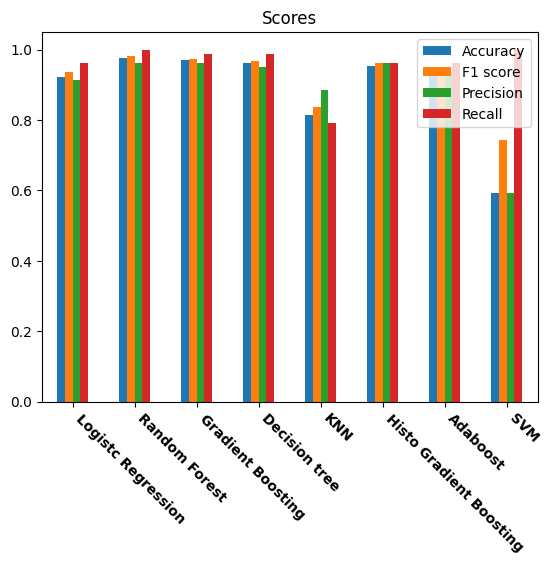

In [41]:
ax = scores.plot.bar()
ax
ax.set_xticklabels(
    [
        "Logistc Regression",
        "Random Forest",
        "Gradient Boosting",
        "Decision tree",
        "KNN",
        "Histo Gradient Boosting",
        "Adaboost",
        "SVM",
    ]
)
ax.set_title("Scores")
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", weight="bold")
plt.show()

/home/balde/miniconda3/envs/torch/lib/python3.10/site-packages/scikitplot/plotters.py:33: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  warnings.warn("This module was deprecated in version 0.3.0 and its functions "
/home/balde/miniconda3/envs/torch/lib/python3.10/site-packages/scikitplot/metrics.py:766: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)(float(i) / len(classes))
/home/balde/miniconda3/envs/torch/lib/python3.10/site-packages/scikitplot/metrics.py:766: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. U

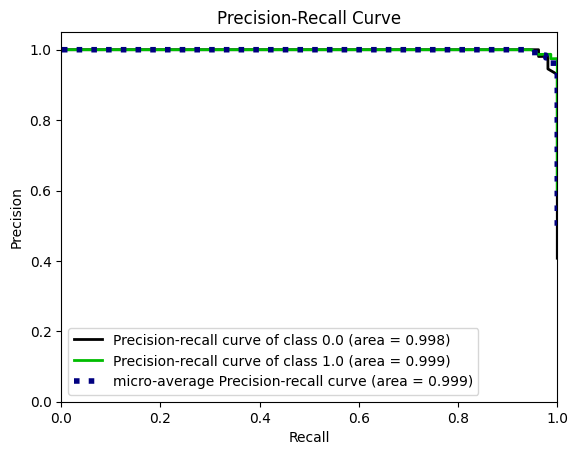

In [43]:
import scikitplot as skplt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

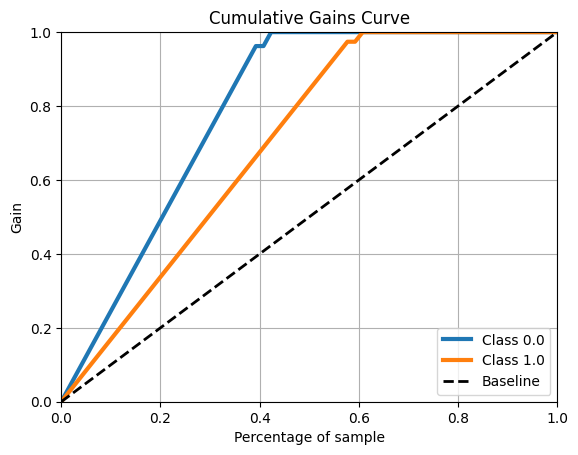

In [44]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

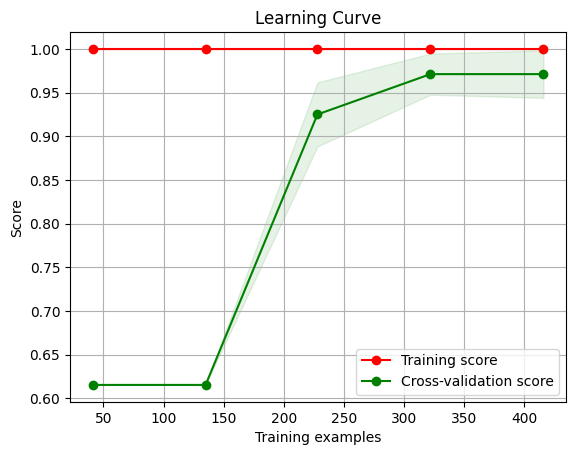

In [45]:
skplt.estimators.plot_learning_curve(rf, X, y)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

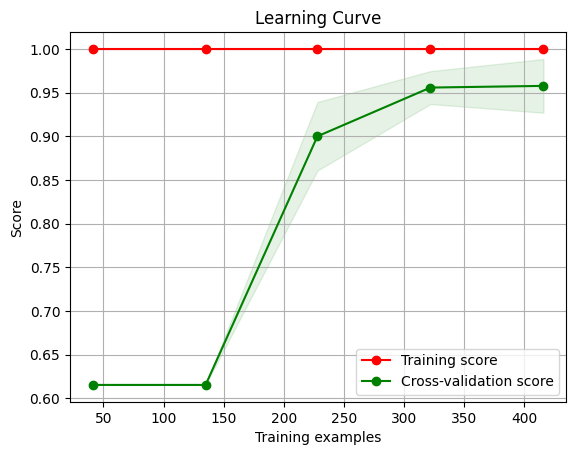

In [46]:
skplt.estimators.plot_learning_curve(dt, X, y)